# Imports

In [1]:
import sys
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, AddPolicy, RemovePolicy, Vacation, Propaganda, setup_city_layout, AddPolicyInfectedRate, confidence_interval, multiple_runs
from model.utils import SocialPolicy
import matplotlib.pyplot as plt
import pandas as pd
import os
from datetime import timedelta

## Parameters settings

In [2]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9,
    mask_efficacy = 0.6,
    imune_rate = 0.01,
    initial_infection_rate = 0.005,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
    risk_tolerance_mean = 0.2,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.7,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 0.25, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20)
)

sc = 10
population_size = 500
simulation_cycles = 60 # days
seed = 31415
np.random.seed(seed)
params = copy.deepcopy(common_parameters)

## Adding Vacation as a listener

In [3]:
# Vacation, start_day, end_day, selection_probability, contagion_probability 
listeners = [
    ["Vacation", 20, 30, 0.3, 0.5]
]

Save these seeds if you want to rerun a scenario
[9675]
log initialized
Average similarity between family members is 0.9999083828001611 at temperature -1
Average similarity between family and home is 0.9998935499842198 at temperature -1
Average similarity between students and their classroom is 0.9998855452836183 at temperature -1
Average classroom occupancy is 5.08 and number classrooms is 25
Average similarity between workers is 0.9999099922057005 at temperature -1
Average office occupancy is 3.1171171171171173 and number offices is 111
Average friend similarity for adults: 0.9998831364814229 for kids: 0.9998860367925783
home_districts
[
Home (0,0) district with 10 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 20 allocated units with a total of 51 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 19 allocated units with a total of 56 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 20 allocated units with a t

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


using average of time series:
stats on susceptible:
data: [0.8699999999999999]
min:
0.8699999999999999
max:
0.8699999999999999
std:
0.0
mean:
0.8699999999999999
median:
0.8699999999999999
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on infected:
data: [0.10003333333333335]
min:
0.10003333333333335
max:
0.10003333333333335
std:
0.0
mean:
0.10003333333333335
median:
0.10003333333333335
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on recovered:
data: [0.015966666666666667]
min:
0.015966666666666667
max:
0.015966666666666667
std:
0.0
mean:
0.015966666666666667
median:
0.015966666666666667
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on hospitalization:
data: [0.005966666666666667]
min:
0.005966666666666667
max:
0.005966666666666667
std:
0.0
mean:
0.005966666666666667
median:
0.005966666666666667
95% confidence interval for the mean:
(nan,nan)
using average of time series:
st

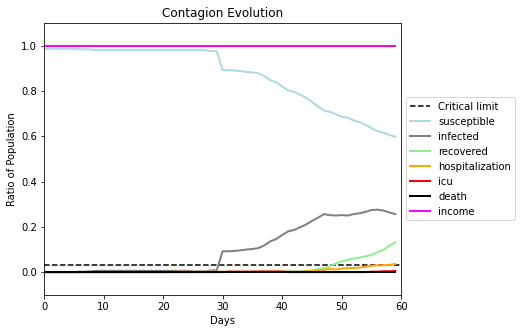

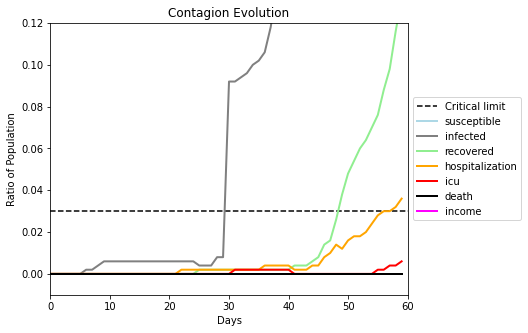

In [4]:
%%time
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)

seeds = [9675]
setLevel(logging.CRITICAL)
lower, average, upper, color, statistics, avg,  last,  peak = multiple_runs(
    params,
    population_size,
    simulation_cycles,
    seeds = seeds,
    fname = "ramon",
    do_print = True, 
    desired_stats = ["susceptible", "infected", "recovered", "hospitalization", "icu", "death", "income"],
    listeners = listeners
)